In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [19]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [23]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=11)

Epoch 1/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6557 - accuracy: 0.8332 - val_loss: 0.3640 - val_accuracy: 0.8993
Epoch 2/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3404 - accuracy: 0.9048 - val_loss: 0.2964 - val_accuracy: 0.9177
Epoch 3/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2913 - accuracy: 0.9183 - val_loss: 0.2640 - val_accuracy: 0.9252
Epoch 4/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2602 - accuracy: 0.9269 - val_loss: 0.2417 - val_accuracy: 0.9324
Epoch 5/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2366 - accuracy: 0.9342 - val_loss: 0.2214 - val_accuracy: 0.9375
Epoch 6/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2174 - accuracy: 0.9394 - val_loss: 0.2056 - val_accuracy: 0.9410
Epoch 7/11
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2016 - accuracy: 0.9437 - val_loss: 0.1914 - val_accuracy:

In [24]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1537 - accuracy: 0.9556
Loss=0.154
Accuracy=0.956


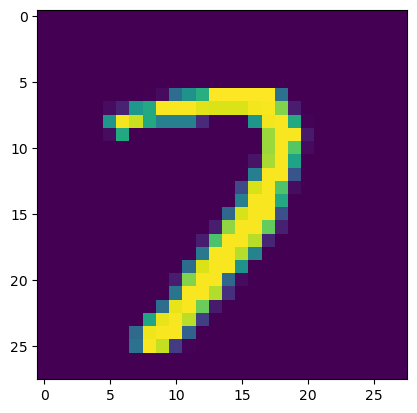

313/313 [==============================] - 0s 1ms/step


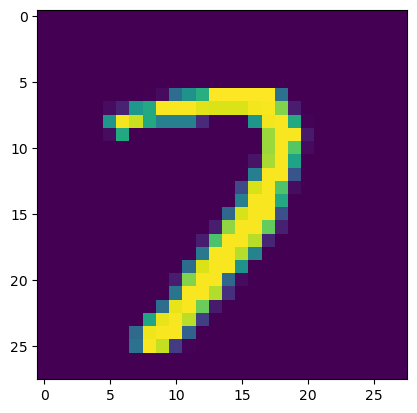

In [25]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [26]:
print('Predicted Value: ', predicted_value[n])

Predicted Value:  [4.7280860e-06 1.1511249e-06 4.9828389e-03 3.1806293e-03 3.4844668e-06
 1.2383960e-06 4.1108752e-09 9.9015105e-01 5.9197337e-05 1.6158238e-03]


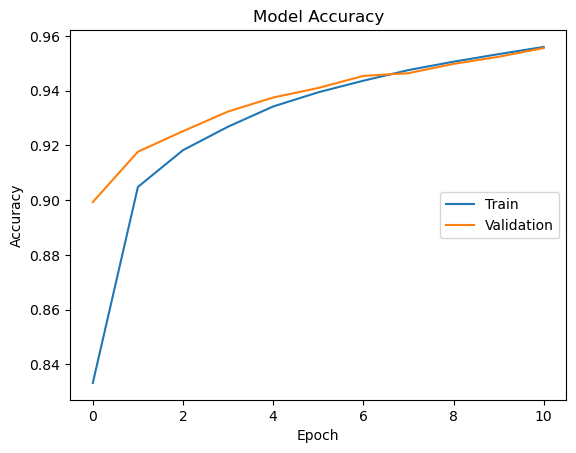

In [27]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

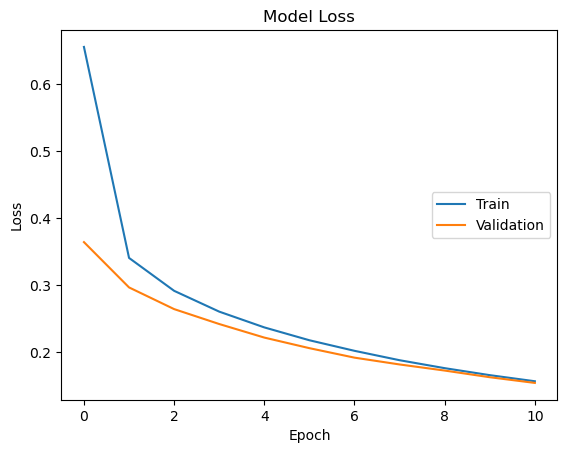

In [28]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()